# Walmart Challenge - EDA

In [34]:
# imports
import numpy as np
import pandas as pd

# Data-Viz 
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
# import plotly.graph_objs as go
sns.set()



## Load Data

In [2]:
df = pd.read_csv('train.csv', parse_dates=[2])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


The dataset consist on 421570 rows containing weekly sales of Walmart's `(Store,Dept)` pairs from `2010-02-05` to `2012-10-26`. Additionally, the dataframe has a column named `IsHoliday`

In [3]:
print('Summary:\n shape: {}\n t_start: {}\n t_end: {}'.format(df.shape, df['Date'].min().date().strftime(format='%Y-%m-%d'), 
                                                        df['Date'].max().date().strftime(format='%Y-%m-%d')))
print('\nTypes:')
df.dtypes

Summary:
 shape: (421570, 5)
 t_start: 2010-02-05
 t_end: 2012-10-26

Types:


Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [4]:
#  Print basic statistics
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Check for NaN or null elements in the dataset, note that the number of falses equals the total number of rows for each column. In other words, no `NaN`

In [5]:
print('Checking for NaN values....')
for col in df.columns:
    print(df[col].isna().value_counts())

Checking for NaN values....
False    421570
Name: Store, dtype: int64
False    421570
Name: Dept, dtype: int64
False    421570
Name: Date, dtype: int64
False    421570
Name: Weekly_Sales, dtype: int64
False    421570
Name: IsHoliday, dtype: int64


## Exercise 1
Plot the mean weekly sales for all stores along the whole time period available.

In [6]:
# Start by constructing the dataframe: group by Date and aggregate the Weekly_Sales column
by_date = df.sort_values('Date').groupby(['Date'], as_index=False).agg({'Weekly_Sales': ['mean', 'std', 'count']})
by_date.columns = by_date.columns.droplevel().map(str)
by_date.columns = ['Date', 'mean_weekly_sales', 'std_weekly_sales', 'count_weekly_sales']
by_date.head()


,Date,mean_weekly_sales,std_weekly_sales,count_weekly_sales
0,2010-02-05,16836.121997,25125.980371,2955
1,2010-02-12,16352.056032,22707.372063,2956
2,2010-02-19,16216.658979,22486.061153,2977
3,2010-02-26,14899.549688,21357.315432,2951
4,2010-03-05,15921.015727,22746.116429,2944


### Three types of visualizations
You can start simple (and fast, in going)

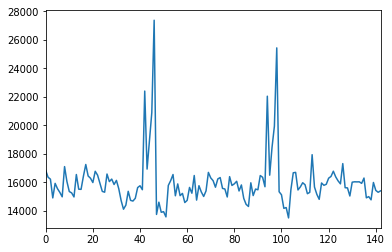

In [7]:
# Plot the mean weekly sales for all stores
by_date['mean_weekly_sales'].plot()

Or, you can include some error bars, which in this case do not give much info, only that the distribution
 appears to have small variance

<ErrorbarContainer object of 3 artists>

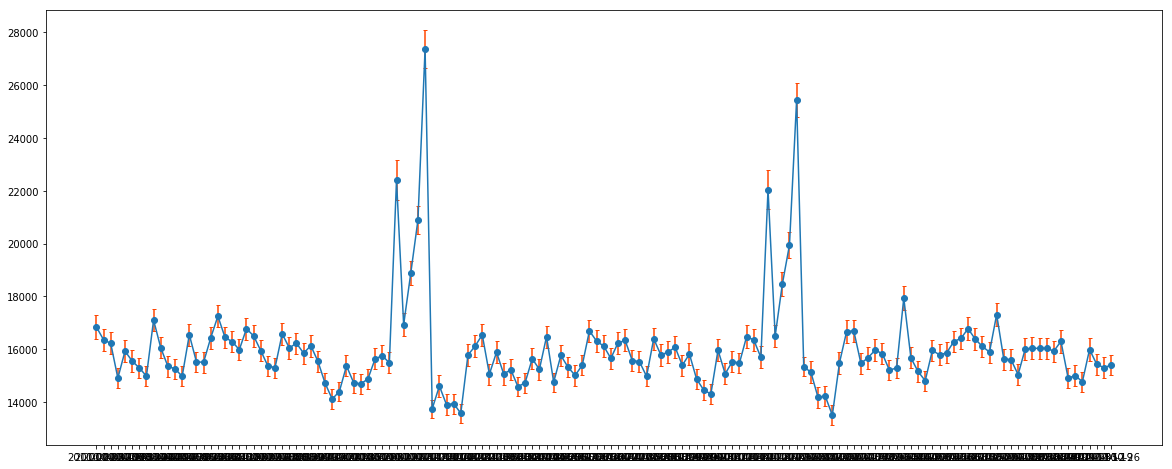

In [8]:
fig = plt.figure( figsize=(20,8))
plt.errorbar(by_date['Date'].astype('str'),by_date['mean_weekly_sales'], 
             yerr=by_date['std_weekly_sales'] / (by_date['count_weekly_sales'].pow(0.5)),
             fmt='-o', ecolor='orangered',capsize=2 )

Let's do it in somewhere in the middle

Text(0.5, 1.0, 'Mean Weekly Sales (all stores)')

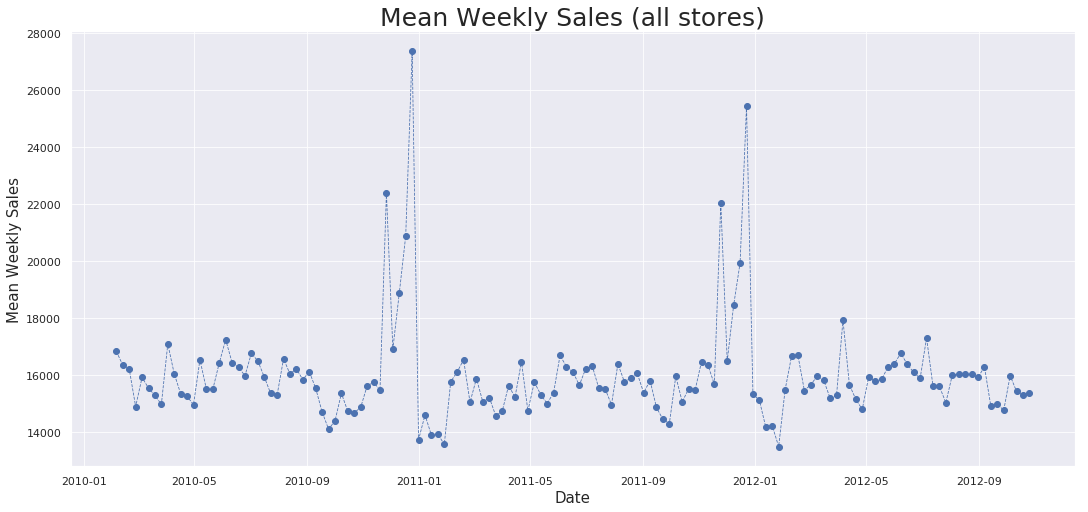

In [78]:
plt.figure(figsize=(18,8))
plt.plot_date(by_date['Date'], by_date['mean_weekly_sales'], '--o', linewidth=0.8, xdate=True )
plt.grid(b=True, linewidth = 0.8)
plt.xlabel('Date', fontdict={'fontsize': '15'})
plt.ylabel('Mean Weekly Sales', fontdict= {'fontsize': '15'})
plt.title('Mean Weekly Sales (all stores)', fontdict = {'fontsize':'25'})

## Exercicío 2
Encontre o conjunto de 10 lojas que melhor perfomaram. Plote o gráfico de desempenho médio dessas lojas no período disponível.

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
by_store = df.groupby(['Store'], as_index=False).agg({'Weekly_Sales': 'mean'})
by_store.columns = ['Store', 'mean_sales']
by_store.sort_values(by = 'mean_sales', inplace = True, ascending = False)
by_store.head()

,Store,mean_sales
19,20,29508.301592
3,4,29161.210415
13,14,28784.851727
12,13,27355.136891
1,2,26898.070031


In [12]:
# Choose the top 10 
top_10 = by_store[:10]

#  and the bottom 10
bottom_10 = by_store[-10:]

Text(0.5, 1.0, 'Melhores 10 Lojas')

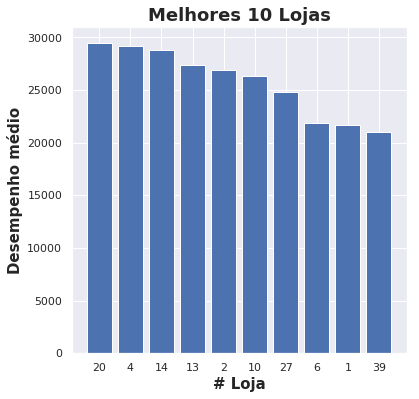

In [36]:
plt.figure(figsize=(6,6))
plt.bar(x=[x for x in range(10)], height = 'mean_sales', data= top_10, align = 'center')
plt.xticks([x for x in range(10)], [store for store in top_10['Store']])
plt.xlabel('# Loja', fontweight='bold', fontsize='15')
plt.ylabel('Desempenho médio', fontweight= 'bold', fontsize= '15')
plt.title('Melhores 10 Lojas', fontweight='bold', fontsize='18')


## Exercicío 3
Faça o mesmo que foi proposto no exercício 2, mas agora com as 10 lojas que pior performaram.

Text(0.5, 1.0, 'Piores 10 Lojas')

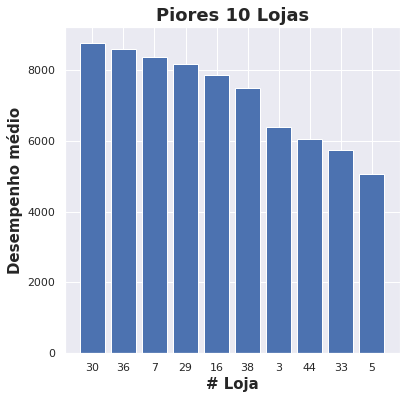

In [55]:
plt.figure(figsize=(6,6))
plt.bar(x=[x for x in range(10)], height = 'mean_sales', data= bottom_10, align = 'center')
plt.xticks([x for x in range(10)], [store for store in bottom_10['Store']])
plt.xlabel('# Loja', fontweight='bold', fontsize='15')
plt.ylabel('Desempenho médio', fontweight= 'bold', fontsize= '15')
plt.title('Piores 10 Lojas', fontweight='bold', fontsize='18')


Text(0.5, 1.0, 'Piores 10 Lojas')

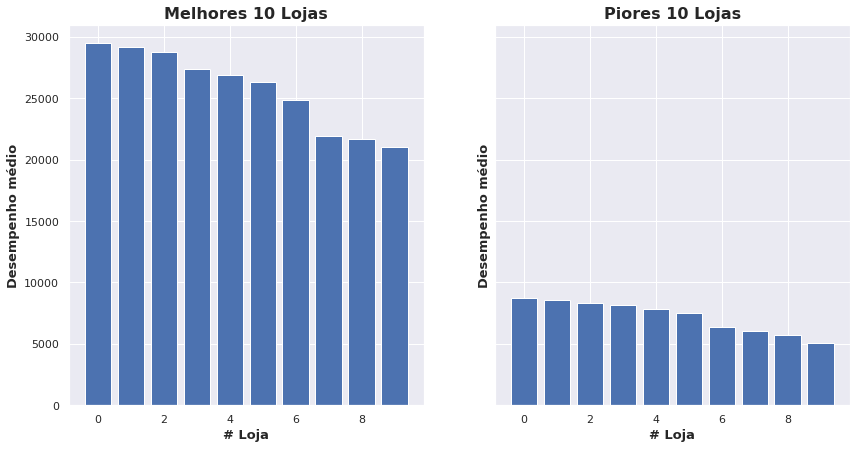

In [58]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize=(14,7))
ax[0].bar(x=[x for x in range(10)], height = 'mean_sales', data= top_10, align = 'center')
ax[0].set_xticks([x for x in range(10)], [store for store in top_10['Store']])
ax[0].set_xlabel('# Loja', fontweight='bold', fontsize='13')
ax[0].set_ylabel('Desempenho médio', fontweight= 'bold', fontsize= '13')
ax[0].set_title('Melhores 10 Lojas', fontweight='bold', fontsize='16')

ax[1].bar(x=[x for x in range(10)], height = 'mean_sales', data= bottom_10, align = 'center')
ax[1].set_xticks([x for x in range(10)], [store for store in bottom_10['Store']])
ax[1].set_xlabel('# Loja', fontweight='bold', fontsize='13')
ax[1].set_ylabel('Desempenho médio', fontweight= 'bold', fontsize= '13')
ax[1].set_title('Piores 10 Lojas', fontweight='bold', fontsize='16')


# Exercício 4

Dê o faturamento médio e mediano das lojas em semanas sem feriados. Faça o mesmo para as semanas com feriados.  Plote gráficos do desempenho médio com e sem feriados ao longo do período.
Feriados impactam negativa ou positivamente as vendas?


Let's use the `IsHoliday` column of the dataframe as a filter to select data accordingly

In [61]:
holy_df = df[df['IsHoliday']]
unholy_df = df[~df['IsHoliday']]

Now we can group data by store and aggregate

In [72]:
# Holy set
holy_by_store = holy_df.sort_values(by= 'Date').groupby('Store', as_index= False).agg({'Weekly_Sales':['mean', 'median']})
holy_by_store.columns = holy_by_store.columns.droplevel().map(str)
holy_by_store.columns = ['Store', 'mean_w_sales', 'median_w_sales']

# Unholy set
unholy_by_store = unholy_df.sort_values(by= 'Date').groupby('Store', as_index= False).agg({'Weekly_Sales':['mean', 'median']})
unholy_by_store.columns = unholy_by_store.columns.droplevel().map(str)
unholy_by_store.columns = ['Store', 'mean_w_sales', 'median_w_sales']



In [73]:
unholy_by_store.head()

,Store,mean_w_sales,median_w_sales
0,1,21609.634733,10225.670
1,2,26753.864227,14235.355
2,3,6332.098604,2782.110
3,4,29032.260570,15042.860
4,5,5010.249172,2567.240


In [75]:
holy_by_store.head()

,Store,mean_w_sales,median_w_sales
0,1,23039.386667,11146.790
1,2,28798.710526,16048.620
2,3,6916.446288,3096.500
3,4,30854.231417,16384.590
4,5,5617.212609,2791.715


<BarContainer object of 45 artists>

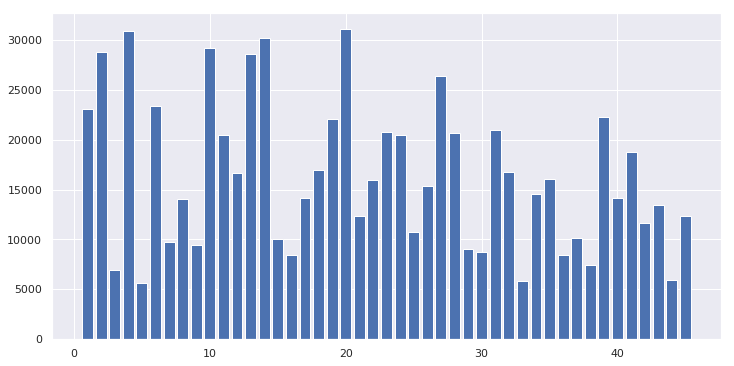

In [82]:
plt.figure(figsize=(12,6))
plt.bar(x='Store', height = 'mean_w_sales', data= holy_by_store, align = 'center')